# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [fardan rifki munawar]
- **Email:** [fardanrifkimunawar@gmail.com]
- **ID Dicoding:** [fardan rifki munaawar]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa produk paling banyak secara penjualan dan juga paling banyak menghasilkan revenue pada kurun waktu dari tahun 2016 hingga 2018?
- Pertanyaan 2 : kota manakah yang menjadi best market bagi produk yang kita jusl jika dilihat dari produk yang terjual terbanyak serta revenue yang di dapat dari tahun 2016 sampai 2018?

## Import Semua Packages/Library yang Digunakan

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

**Markdown:**
- Saya mengumpulkan beberapa  dataset dari data yang disediakan, yaitu customers, order_items, orders, products, product_category_name_translation.
- Saya menggabungkan beberapa dataset menggunakan merge.
- Dataset yang saya gabungkan adalah orders, order_itens, products, dan product_category_name_translation. dan menghasilkan 2 dataset baru yaitu best_selling_product_df, dan juga product_name_ENG.
- Saya menggabungkan 2 dataset baru itu menjadi best_selling_product untuk menjawab pertanyaan pertama, lalu menggabungkan dataset customers_dataset dengan dataset best_selling_product untuk menjawab pertanyaan kedua.
- Saya juga menggabungkkan df_orders dengan df_order_items serta df_customers untuk menyiapkan data yang akan digunakan pada analisi data lanjutan dimana saya menggunakan metode analisis RFM.

In [109]:
df_customers = pd.read_csv("data/customers_dataset.csv")

In [110]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [111]:
df_orders = pd.read_csv("data/orders_dataset.csv")

In [112]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [113]:
df_order_items = pd.read_csv("data/order_items_dataset.csv")

In [114]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [115]:
df_products_dataset = pd.read_csv("data/products_dataset.csv")

In [116]:
df_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [117]:
df_product_category_name = pd.read_csv("data/product_category_name_translation.csv")

In [118]:
df_product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [119]:
best_selling_product_df = pd.merge(
    left=df_orders,
    right=df_order_items,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [120]:
best_selling_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [121]:
product_name_ENG = pd.merge(
    left=df_products_dataset,
    right=df_product_category_name,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [122]:
product_name_ENG.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [123]:
best_selling_product = pd.merge(
    left=best_selling_product_df,
    right=product_name_ENG,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

In [124]:
best_selling_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [125]:
best_city_of_customers = pd.merge(
    left=df_customers,
    right=best_selling_product,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

In [126]:
best_city_of_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [127]:
rfm_df = df_orders.merge(
    df_order_items,
    on='order_id',
    how='inner'
).merge(
    df_customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner'
)


In [128]:
rfm_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6


**Insight:**
Terdapat 9 dataset mentah yang bersifat relasional.
 - Temuan peting pertama : tebel df_order_items harus digabung dengan tabel df_products agar kolom price dengan  kolom item_orders_id berada dalam saatu tebl.
 - Temuan penting kedua : kolom nama product di tabel df_product masih menggunakan bahasa portugis sehingaa tidak beersifat global sehingga harus digabungkan dengan kolom product_category_name_english yang beraada di tabel df_product_category_name
 - Temuan penting ketiga : tabel df_custtomers harus digabung dengan tabel df_order_items agar kolom customer_city dan kolom order_item_id berda dalam satu tabel yang sama.
 - Temuan penting ketiga : sssaya menggabungkan 3 tabel yaitu tabel df_orders, tabel df_orrder_items, dan tabel _dfcustomers untuk menyiapkan data yang dibutuhkan untuk melakukan analisis RFM analisis.

### Assessing Data

**Maarkdown**:
- Saya melakukan pengecekan type data menggunakan function .info().
- Saya melakukan pengecekan missing value menggunakan function .isnull() dan .sum() agar yang ditampilkan aadalah hasil total dari misssing value yang ada di kolom tertentu.
- Saya melakukan pengecekan data duplicate menggunakn function .duplicated() dan .sum() untuk menampillkan total dari data duplicate.
- Saya melakukan pengecekan outlier menggunakan uotlier summary 

In [129]:
best_selling_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   customer_id                    111023 non-null  object 
 2   order_status                   111023 non-null  object 
 3   order_purchase_timestamp       111023 non-null  object 
 4   order_approved_at              111009 non-null  object 
 5   order_delivered_carrier_date   109868 non-null  object 
 6   order_delivered_customer_date  108637 non-null  object 
 7   order_estimated_delivery_date  111023 non-null  object 
 8   order_item_id                  111023 non-null  int64  
 9   product_id                     111023 non-null  object 
 10  seller_id                      111023 non-null  object 
 11  shipping_limit_date            111023 non-null  object 
 12  price                         

In [130]:
best_city_of_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    111023 non-null  object 
 1   customer_unique_id             111023 non-null  object 
 2   customer_zip_code_prefix       111023 non-null  int64  
 3   customer_city                  111023 non-null  object 
 4   customer_state                 111023 non-null  object 
 5   order_id                       111023 non-null  object 
 6   order_status                   111023 non-null  object 
 7   order_purchase_timestamp       111023 non-null  object 
 8   order_approved_at              111009 non-null  object 
 9   order_delivered_carrier_date   109868 non-null  object 
 10  order_delivered_customer_date  108637 non-null  object 
 11  order_estimated_delivery_date  111023 non-null  object 
 12  order_item_id                 

In [131]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [132]:
best_selling_product.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1155
order_delivered_customer_date    2386
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name_english       0
dtype: int64

In [133]:
best_city_of_customers.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1155
order_delivered_customer_date    2386
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_cate

In [134]:
rfm_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
dtype: int64

In [135]:
best_selling_product.duplicated().sum()

np.int64(0)

In [136]:
best_city_of_customers.duplicated().sum()

np.int64(0)

In [137]:
rfm_df.duplicated().sum()

np.int64(0)

In [138]:
numerical_cols = best_selling_product.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['order_item_id', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [139]:
cols_for_outlier_BSP = ['price', 'freight_value']



In [140]:
best_selling_product = best_selling_product.dropna(subset=cols_for_outlier_BSP)


In [141]:
outlier_summary = {}

for col in cols_for_outlier_BSP:
    Q1 = best_selling_product[col].quantile(0.25)
    Q3 = best_selling_product[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = best_selling_product[
        (best_selling_product[col] < lower) |
        (best_selling_product[col] > upper)
    ]

    outlier_summary[col] = outliers.shape[0]

outlier_summary


{'price': 8340, 'freight_value': 11980}

**Insight:**
- Setelah melakukan pengecekan ditemukan beberapa kolom yang memiliki missing value cukup banyak yaitu di kolom order_delivered_carrier_date, dan juga di kolom order_delivered_customer_date yang perlu ditangani agar tidak menjadi bias dalam melakukan analisis.
- Ditemukan juga kolom datetime seperti order_estimated_delivery_date yang masih bertipe object dimana ini akan menjadi maslah ketika akan melakukan analisa tren waktu yang ada di RFM analisis.
- Tapi tidak ditemukan adanya data duplicate sehingga tidak akan menyebabkan kelebihan data karena ada data yang sama.
- Terdapat banyak data outlier namun karena data tersebut rentan dikategorikan sebagai outlier saya tidak akan menghapus nya karena merupakan data penting untuk melakukan analisis. 

### Cleaning Data

**Markdown**:

- saya menggunakan function .dropna untuk membuang missing value.
- Saya membuang kolom yang tidak saya gunakan, dan hanya mmenyimpan kolom yang akan digunakan dengan membuat list kolom  yang akan saya simpan dalam tabel.
- saya mengubah tipe data object menjadi datetime menggunakan pd.to_datetime.

In [142]:
best_selling_product.dropna(axis=0, inplace=True)

In [143]:
best_city_of_customers.dropna(axis=0, inplace=True)

In [144]:
cols_to_keep = [
    'order_purchase_timestamp',
    'product_id',
    'product_category_name_english',
    'price',
    'freight_value',
    'order_item_id'
]

best_selling_product = best_selling_product[cols_to_keep]


In [145]:
best_selling_product['order_purchase_timestamp'] = pd.to_datetime(best_selling_product['order_purchase_timestamp']).dt.date

best_selling_product['order_purchase_timestamp'] = pd.to_datetime(best_selling_product['order_purchase_timestamp'])

In [146]:
best_selling_product.reset_index(drop=True, inplace=True)


In [147]:
cols_to_keep = [
    'order_purchase_timestamp',
    'customer_city',
    'order_id',
    'order_item_id',
    'price',
    'product_id',
    'product_category_name_english'
]

best_city_of_customers = best_city_of_customers[cols_to_keep]

In [148]:
best_city_of_customers['order_purchase_timestamp'] = pd.to_datetime(best_city_of_customers['order_purchase_timestamp']).dt.date

best_city_of_customers['order_purchase_timestamp'] = pd.to_datetime(best_city_of_customers['order_purchase_timestamp'])

In [149]:
best_city_of_customers.reset_index(drop=True, inplace=True)


In [150]:
rfm_df = rfm_df[[
    'customer_unique_id',
    'order_id',
    'order_purchase_timestamp',
    'price'
]].dropna()


In [151]:
rfm_df.reset_index(drop=True, inplace=True)

In [152]:
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])
snapshot_date = rfm_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)

**Insight:**
- Setelah dilakukan cleaning data sudah tidak ada lagi missing value yang akan menyebabkan bias.
- Tidak ada data duplicate jadi tidak ada yang harus saya hapus.
- Saya tidak menghapus outlier karena dalam konteks bisnis bisa saja outlier terpengaruh oleh berbagai faktor jadi tidak saya hapus demi kepentingan analisis.
- Setelah dilakukan claaning data saya membuang beberapa kolom karena tidak akan digunakan dan tidak berdampak pada hasil analisa.

## Exploratory Data Analysis (EDA)

### Explore ...

**Markdown**:

- Saya menggunakan function .describe() untuk menampilkan descriptive statistic dari tabe.
- saya mengelompokan data mmengguanakn function .groupby() lalu mengurutkan nilainya menggunakan function .sort_values()
- Saya menggabungkan tabel mengunakan pd.merge() dan mengunduh dataset menggunakan function .to_csv() 

In [153]:
best_selling_product.describe()

,order_purchase_timestamp,price,freight_value,order_item_id
count,108621,108621.000000,108621.000000,108621.000000
mean,2018-01-02 05:26:38.508576,120.061447,19.982794,1.198645
min,2016-09-15 00:00:00,0.850000,0.000000,1.000000
25%,2017-09-15 00:00:00,39.900000,13.080000,1.000000
50%,2018-01-22 00:00:00,74.900000,16.290000,1.000000
75%,2018-05-06 00:00:00,134.900000,21.160000,1.000000
max,2018-08-29 00:00:00,6735.000000,409.680000,21.000000
std,NaN,181.989608,15.734297,0.708595


In [154]:
best_city_of_customers.describe()

,order_purchase_timestamp,order_item_id,price
count,108621,108621.000000,108621.000000
mean,2018-01-02 05:26:38.508576,1.198645,120.061447
min,2016-09-15 00:00:00,1.000000,0.850000
25%,2017-09-15 00:00:00,1.000000,39.900000
50%,2018-01-22 00:00:00,1.000000,74.900000
75%,2018-05-06 00:00:00,1.000000,134.900000
max,2018-08-29 00:00:00,21.000000,6735.000000
std,NaN,0.708595,181.989608


In [155]:
best_product_sales = (
    best_selling_product.groupby(['product_category_name_english', 'order_purchase_timestamp']).agg(
    total_sold=('order_item_id', 'count')
)
.reset_index()

)

best_product_sales.head()

,product_category_name_english,order_purchase_timestamp,total_sold
0,agro_industry_and_commerce,2017-01-23,2
1,agro_industry_and_commerce,2017-01-31,1
2,agro_industry_and_commerce,2017-02-05,1
3,agro_industry_and_commerce,2017-02-08,1
4,agro_industry_and_commerce,2017-02-12,1


In [156]:
best_product_revenue = (
    best_selling_product.groupby(['product_category_name_english', 'order_purchase_timestamp']).agg(
        total_revenue=('price', 'sum'),
        total_sold=('order_item_id', 'count')
    )
    .reset_index()
    
)

best_product_revenue.head()

,product_category_name_english,order_purchase_timestamp,total_revenue,total_sold
0,agro_industry_and_commerce,2017-01-23,43.98,2
1,agro_industry_and_commerce,2017-01-31,21.99,1
2,agro_industry_and_commerce,2017-02-05,21.99,1
3,agro_industry_and_commerce,2017-02-08,21.99,1
4,agro_industry_and_commerce,2017-02-12,92.90,1


In [157]:
main_data_product = pd.merge(
    best_product_sales,
    best_product_revenue,
    on=['order_purchase_timestamp', 'product_category_name_english'],
    how='inner'
) 

main_data_product = main_data_product.reset_index(0)
main_data_product.to_csv("dashboard/main_data_product.csv", index=False)

In [158]:
main_data_product.head()

,index,product_category_name_english,order_purchase_timestamp,total_sold_x,total_revenue,total_sold_y
0,0,agro_industry_and_commerce,2017-01-23,2,43.98,2
1,1,agro_industry_and_commerce,2017-01-31,1,21.99,1
2,2,agro_industry_and_commerce,2017-02-05,1,21.99,1
3,3,agro_industry_and_commerce,2017-02-08,1,21.99,1
4,4,agro_industry_and_commerce,2017-02-12,1,92.90,1


In [159]:
top_city_by_sales = (
    best_city_of_customers.groupby(['customer_city', 'order_purchase_timestamp']).agg(
        total_sales=('order_item_id', 'count')
    )
    .reset_index()
)

top_city_by_sales.head()

,customer_city,order_purchase_timestamp,total_sales
0,abadia dos dourados,2017-09-02,1
1,abadia dos dourados,2018-03-02,1
2,abadia dos dourados,2018-07-02,1
3,abadiania,2018-01-28,1
4,abaete,2017-05-05,1


In [160]:
top_city_by_revenue =(
    best_city_of_customers.groupby(['customer_city', 'order_purchase_timestamp']).agg(
        total_revenue=('price', 'sum'),
        total_sales=('order_item_id', 'count')
    )
    .reset_index()
)

top_city_by_revenue.head()

,customer_city,order_purchase_timestamp,total_revenue,total_sales
0,abadia dos dourados,2017-09-02,120.00,1
1,abadia dos dourados,2018-03-02,199.00,1
2,abadia dos dourados,2018-07-02,39.90,1
3,abadiania,2018-01-28,949.99,1
4,abaete,2017-05-05,208.90,1


In [161]:
main_data_city = pd.merge(
    top_city_by_sales, top_city_by_revenue,
    on=["customer_city", "order_purchase_timestamp"],
    how="inner" 
)

main_data_city = main_data_city.reset_index(0)
main_data_city.to_csv("dashboard/main_data_city.csv", index=False)

**Insight:**
- Berdasarkan statistik deesskriptif awal ditemukan bahwa persebaran harga produk sangat timpang. dimana sebagain barang berharga rendahh dan ada beberapa outlier dengan harga sangat tinggi.
- begitupun pada pesebaran nilai barang(freight value) ada barang dengan nilai rendah dan juga ada barang yang memiliki nilai sangat tingi.
- di kolom orderitems juga dengan rata rata customer membeli produk dengan kuantitas 1 ssampai 2 barang per pesaanan ada juga customer yang membeli produk dengan kuantitas yanng sangat banyak mencapai 21 produk dalam sekali pesanan.
- Setelah dilakukan peengelompokan data ada 4 data utama yang menunjukan beberapa point penting seperti produk dengaan penjualan terbanyak, produk yang menghasilkan revenue terbesar, kota yang memiliki jumlah pesanan terbanyak dan juga kota yang menghasilkan rrevenue terbesaar dalam penjualan e-commers ini. 

## Visualization & Explanatory Analysis

**Markdown**:

- saaya memvisualisasikan data yang sudah diolah menggunakan sns.barplot karena merupakan bentuk visualisasi paling relevan untuk data yang saya miliki.


In [162]:
def million_formatter(x, pos):
    return f'{x/1e6:.1f}M'

### Pertanyaan 1:

In [164]:
best5_product_sales = main_data_product.groupby('product_category_name_english').total_sold_x.sum().sort_values(ascending=False).head(5).reset_index()

In [166]:
best5_product_revenue = main_data_product.groupby('product_category_name_english').total_revenue.sum().sort_values(ascending=False).head(5).reset_index()

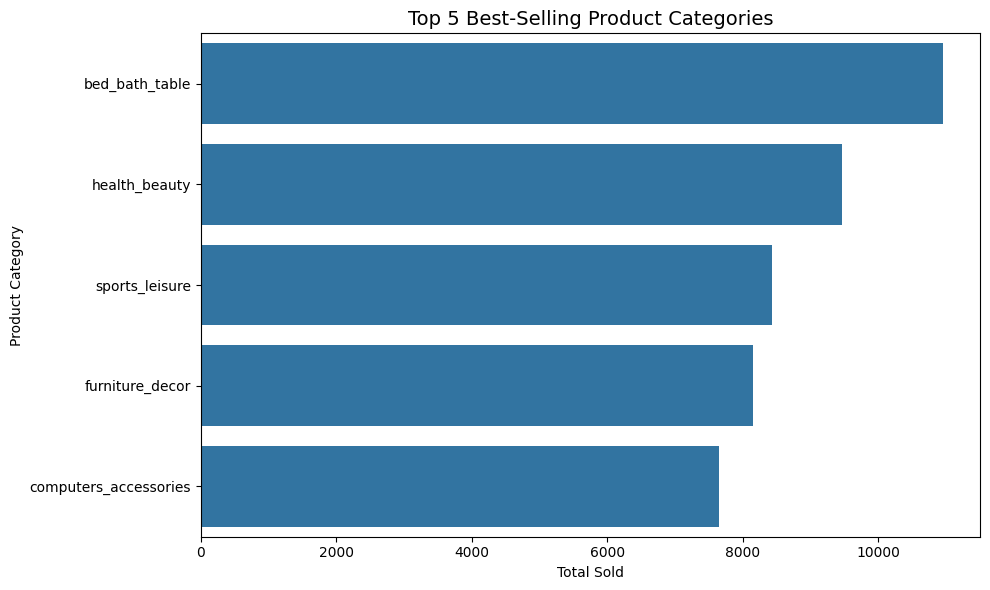

In [167]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=best5_product_sales,
    x='total_sold_x',
    y='product_category_name_english'
)

plt.title('Top 5 Best-Selling Product Categories', fontsize=14)
plt.xlabel('Total Sold')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()


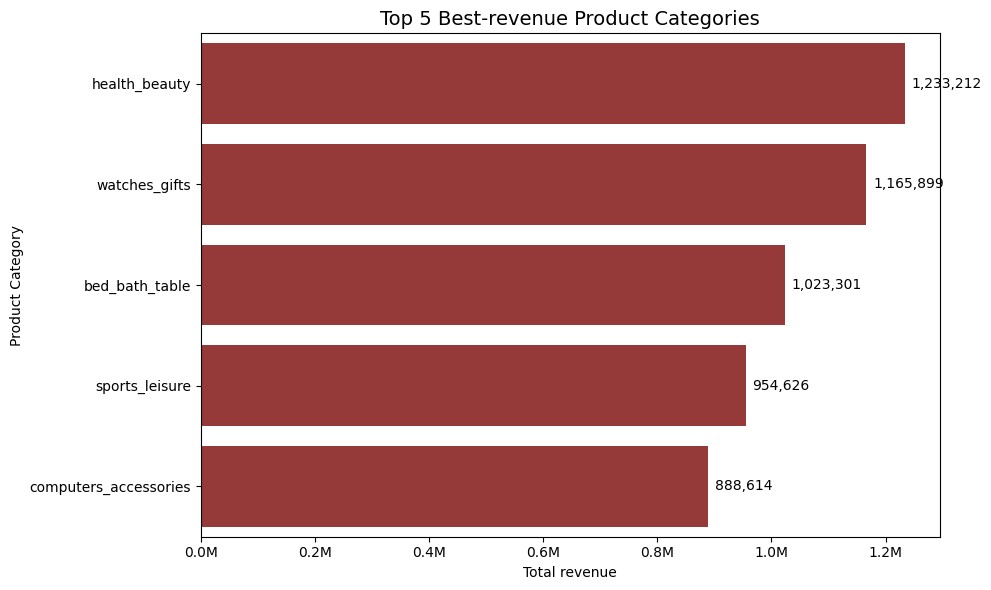

In [168]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=best5_product_revenue,
    x='total_revenue',
    y='product_category_name_english',
    color="brown"

)

ax1=plt.gca()
ax1.bar_label(ax1.containers[0], padding=5, fmt='{:,.0f}', fontsize=10)
ax1.xaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.title('Top 5 Best-revenue Product Categories', fontsize=14)
plt.xlabel('Total revenue')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()


### Pertanyaan 2:

In [169]:
top5_city_by_sales = main_data_city.groupby('customer_city').total_sales_x.sum().sort_values(ascending=False).head(5).reset_index()

In [170]:
top5_city_by_revenue = main_data_city.groupby('customer_city').total_revenue.sum().sort_values(ascending=False).head(5).reset_index()

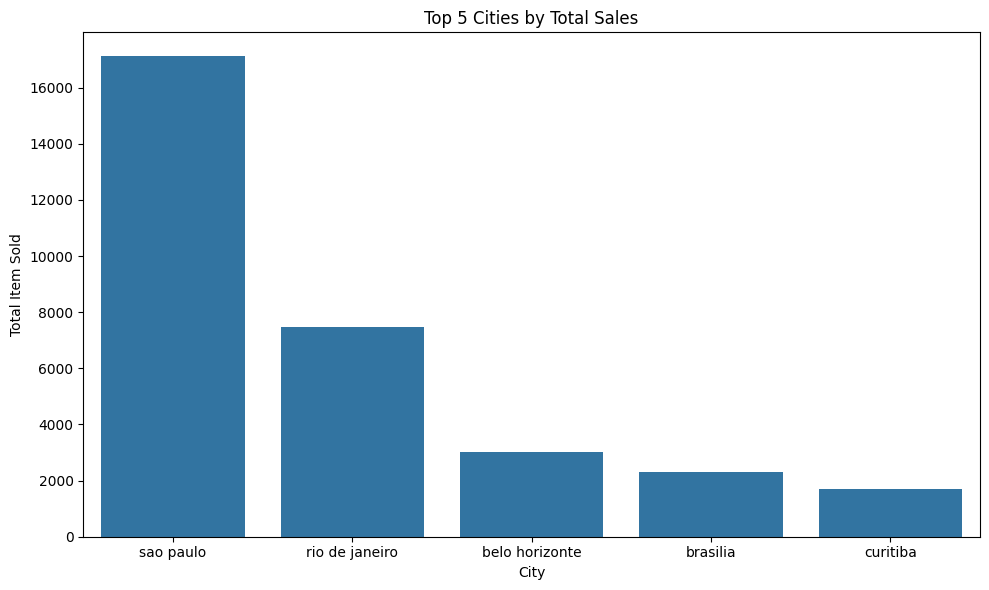

In [171]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top5_city_by_sales,
    x='customer_city',
    y='total_sales_x'
)

plt.title('Top 5 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Item Sold')


plt.tight_layout()
plt.show()


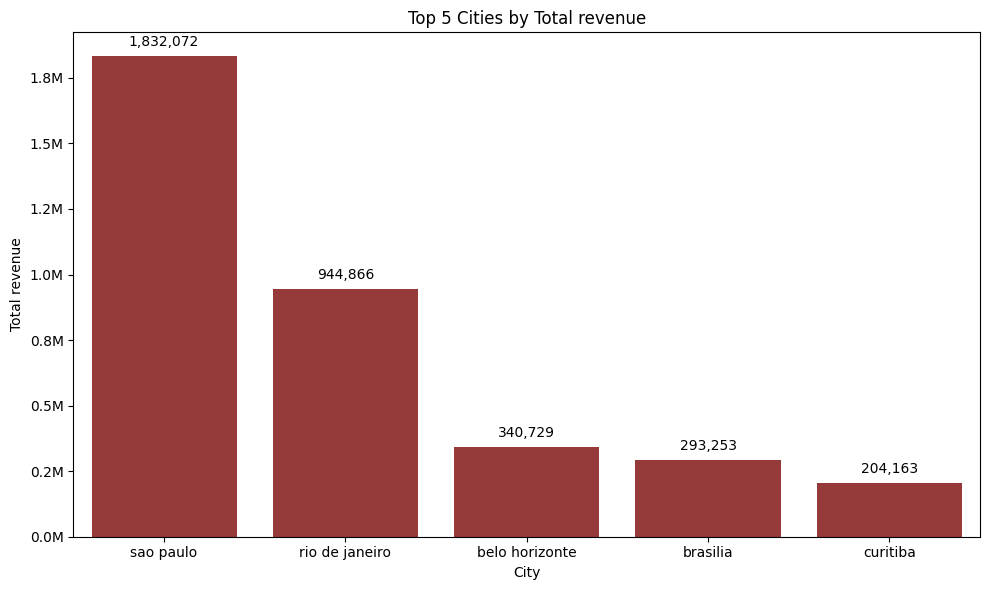

In [172]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top5_city_by_revenue,
    x='customer_city',
    y='total_revenue',
    color="brown"
)

ax2=plt.gca()
ax2.bar_label(ax2.containers[0], padding=5, fmt='{:,.0f}', fontsize=10)
ax2.yaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.title('Top 5 Cities by Total revenue')
plt.xlabel('City')
plt.ylabel('Total revenue')


plt.tight_layout()
plt.show()


## Analisis Lanjutan (Opsional)

**Markdown**:

- saya melakukan analisis lanjutan dengan menggunakan RFM analisis serta melakukan pengurutan data menggunakan data .sort__value() berdasarkan recency, frequency, dan juga monetary.
- saya juga  memvisualisasikan data yang sudah diurutkan menggunakan sns.barplot karena paling relevan dengan data yang saya miliki. 

In [173]:
rfm = rfm_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [174]:
rfm = rfm.reset_index()
rfm.to_csv("dashboard/main_data_RFM.csv", index=False)

In [175]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95420 entries, 0 to 95419
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  95420 non-null  object 
 1   Recency             95420 non-null  int64  
 2   Frequency           95420 non-null  int64  
 3   Monetary            95420 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [176]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [177]:
rfm.sort_values(by='Frequency', ascending=False).head()

,customer_unique_id,Recency,Frequency,Monetary
52597,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,729.62
23302,3e43e6105506432c953e165fb2acf44c,188,9,1000.85
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21
37532,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20
75560,ca77025e7201e3b30c44b472ff346268,94,7,806.61


In [178]:
rfm.sort_values(by='Monetary', ascending=False).head()

,customer_unique_id,Recency,Frequency,Monetary
3799,0a0a92112bd4c708ca5fde585afaa872,339,1,13440.0
81388,da122df9eeddfedc1dc1f5349a1a690c,520,2,7388.0
44139,763c8b1c9c68a0229c42c9fc6f662b93,50,1,7160.0
82230,dc4802a71eae9be1dd28f5d788ceb526,568,1,6735.0
26015,459bef486812aa25204be022145caa62,40,1,6729.0


In [179]:
rfm.sort_values(by='Recency', ascending=False).head()

,customer_unique_id,Recency,Frequency,Monetary
68611,b7d76e111c89f7ebf14761390f0f7d17,729,1,72.89
27050,4854e9b3feff728c13ee5fc7d1547e92,729,1,59.50
48972,830d5b7aaa3b6f1e9ad63703bec97d23,718,1,134.97
5480,0eb1ee9dba87f5b36b4613a65074337c,701,1,100.00
68959,b8b8726af116a5cfb35b0315ecef9172,700,1,21.50


In [180]:
top_rfm_recency = rfm.sort_values(by="Recency", ascending=False).head(5)
top_rfm_frequency = rfm.sort_values(by="Frequency", ascending=False).head(5)
top_rfm_monetary = rfm.sort_values(by="Monetary", ascending=False).head(5)

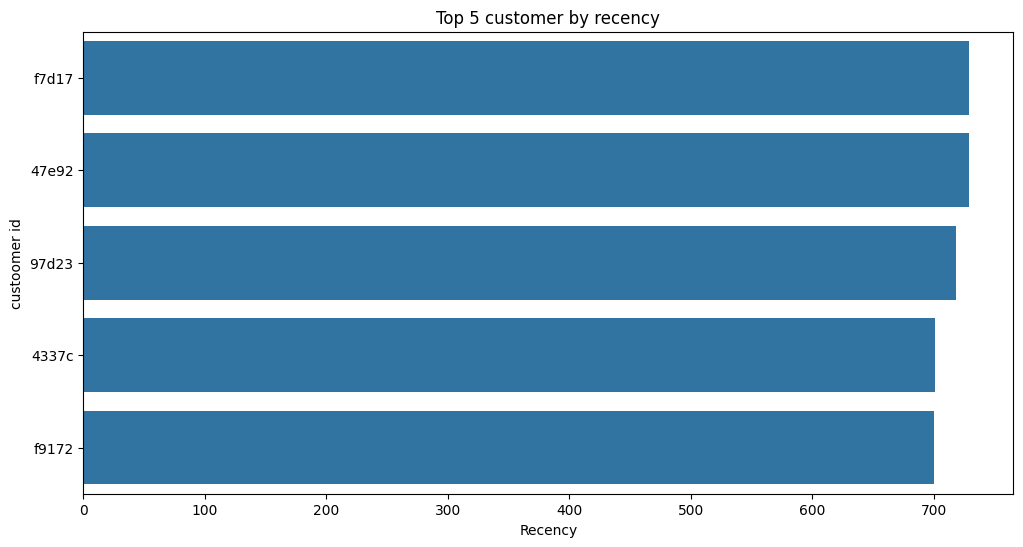

In [181]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=top_rfm_recency,
    x="Recency",
    y=top_rfm_recency['customer_unique_id'].str[-5 :],


)

plt.title('Top 5 customer by recency')
plt.xlabel('Recency')
plt.ylabel('custoomer id')


plt.show()

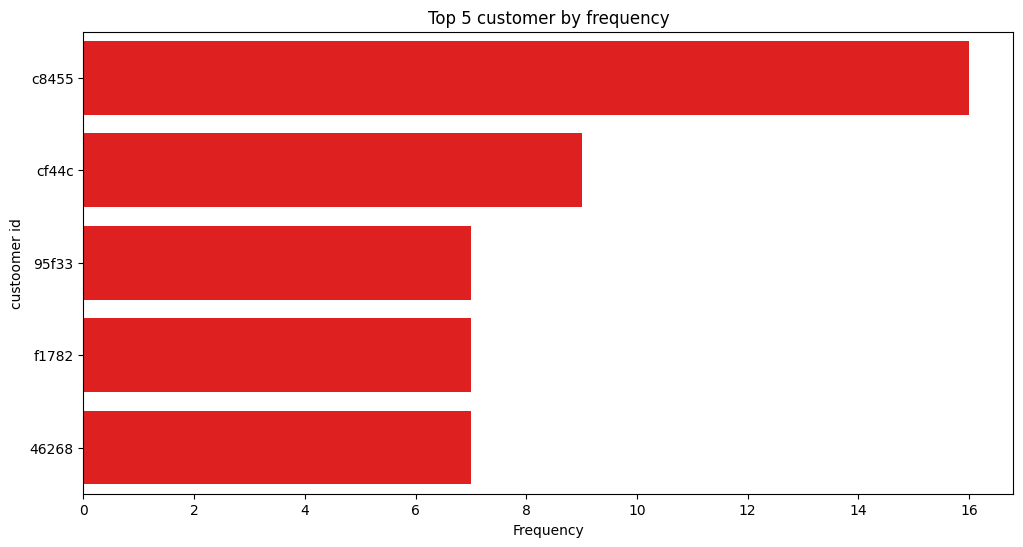

In [182]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=top_rfm_frequency,
    x="Frequency",
    y=top_rfm_frequency['customer_unique_id'].str[-5 :],
    color="red"


)

plt.title('Top 5 customer by frequency')
plt.xlabel('Frequency')
plt.ylabel('custoomer id')


plt.show()

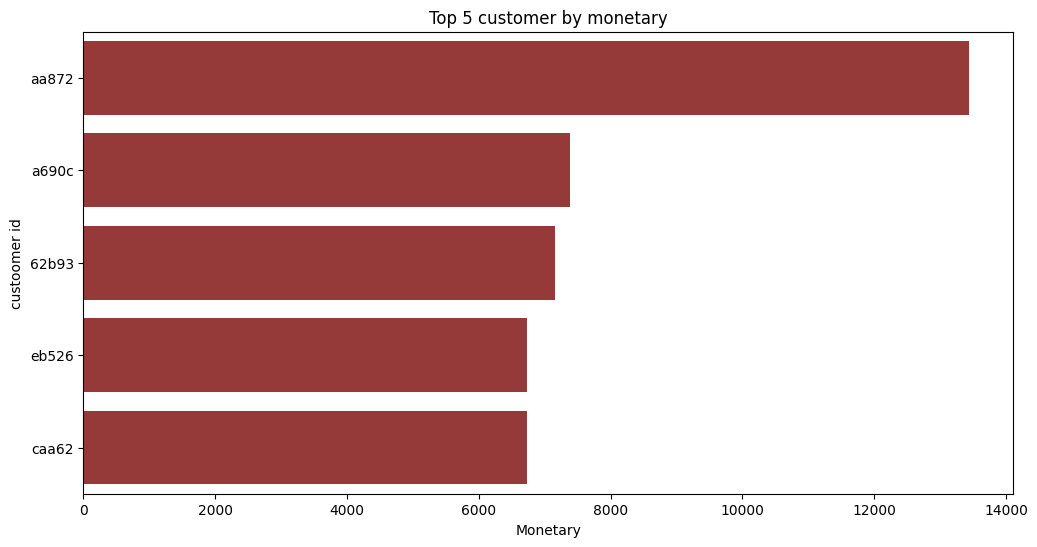

In [183]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=top_rfm_monetary,
    x="Monetary",
    y=top_rfm_monetary['customer_unique_id'].str[-5 :],
    color="brown"


)

plt.title('Top 5 customer by monetary')
plt.xlabel('Monetary')
plt.ylabel('custoomer id')


plt.show()

## Conclusion

- Conclution pertanyaan 1:
    1. product yang paling banyak terjual tidak pasti menjadi product dengan revenue tertinggi karena ada perbedaaan nilai barang antara furniture rumah tangga untuk kamar dan kama mandi dengan produk kesehatan dan kecantikan sehingga walau tidak lebih banyak terjual namun produk di kategori kesehatan dan kecantikan menjadi kategori paling besar menghasilkan revenue.
    2. mungkin ada kecendrungan yang sering melakukan transaksi atau berbelanja di e-commers ini adalah customer perempuan jadi produk kesehatan dan kecantikan serta furniture rumah tangga menjadi kategori paling laris di pasaran. 
- Conclution pertanyaan 2:
    1. kota sao paulo menjadi kota dengan penjualan dan revenue terbesar diantara kota lain.
    2. jumlah pembeli dan juga penyumbang revennu setiap kota dipengruhi oleh jumlah populasi yang ada di kota tersebut.
    3. untuk kedepan nya kita bisa mmprioritaskan penjualan dan promosi di kota yang memiliki jumlah populasi yang banyak, namun tidak mengabaikan potensi customer dari kota lain dan tetap meningkatkan awarnes para calon customer di kota lain. 